In [ ]:
import pandas as pd
df = pd.read_csv('/content/delhiaqi.csv')
df.head()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [ ]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create new time-related features
df['month'] = df['date'].dt.month
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()

# Assign seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['season'] = df['month'].apply(get_season)
df.head()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,month,hour,day,weekday,season
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,1,0,1,Sunday,Winter
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,1,1,1,Sunday,Winter
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,1,2,1,Sunday,Winter
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,1,3,1,Sunday,Winter
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,1,4,1,Sunday,Winter


In [ ]:
# Categorize AQI levels from PM2.5 values using CPCB standards
def pm25_aqi(pm25):
    if pm25 <= 30:
        return 'Good'
    elif pm25 <= 60:
        return 'Satisfactory'
    elif pm25 <= 90:
        return 'Moderate'
    elif pm25 <= 120:
        return 'Poor'
    elif pm25 <= 250:
        return 'Very Poor'
    else:
        return 'Severe'

df['AQI_Category'] = df['pm2_5'].apply(pm25_aqi)
df[['date', 'pm2_5', 'AQI_Category']].head()


,date,pm2_5,AQI_Category
0,2023-01-01 00:00:00,169.29,Very Poor
1,2023-01-01 01:00:00,182.84,Very Poor
2,2023-01-01 02:00:00,220.25,Very Poor
3,2023-01-01 03:00:00,252.90,Severe
4,2023-01-01 04:00:00,266.36,Severe


In [ ]:
# Summary statistics
df.describe()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,month,hour,day
count,561,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.0,561.000000,561.000000
mean,2023-01-12 16:00:00,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062,1.0,11.379679,12.192513
min,2023-01-01 00:00:00,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000,1.0,0.000000,1.000000
25%,2023-01-06 20:00:00,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000,1.0,5.000000,6.000000
50%,2023-01-12 16:00:00,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000,1.0,11.000000,12.000000
75%,2023-01-18 12:00:00,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000,1.0,17.000000,18.000000
max,2023-01-24 08:00:00,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000,1.0,23.000000,24.000000
std,NaN,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094,0.0,6.944696,6.756374


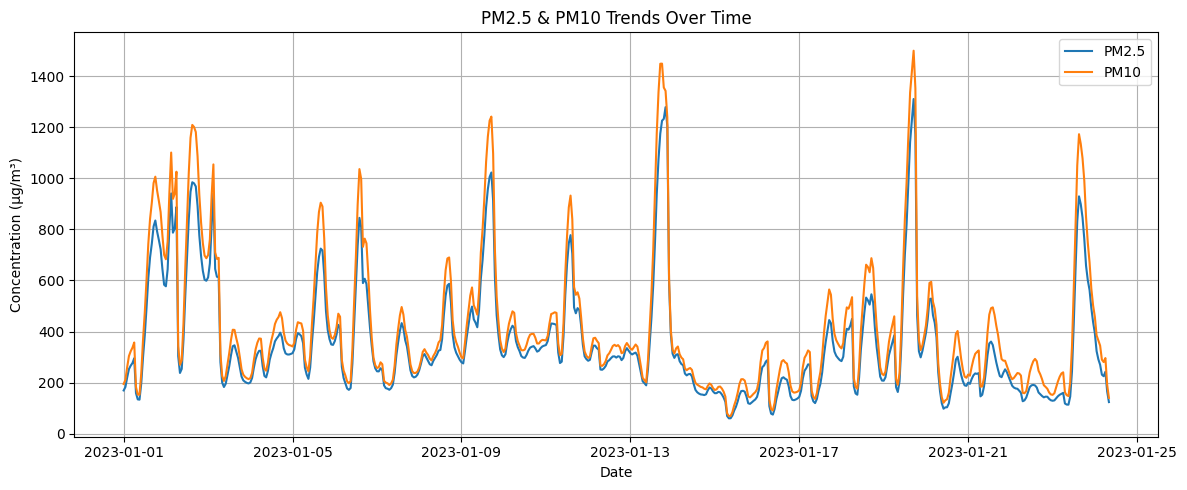

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(x='date', y='pm2_5', data=df, label='PM2.5')
sns.lineplot(x='date', y='pm10', data=df, label='PM10')
plt.title('PM2.5 & PM10 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-12-266372257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AQI_Category', order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'], palette='coolwarm')


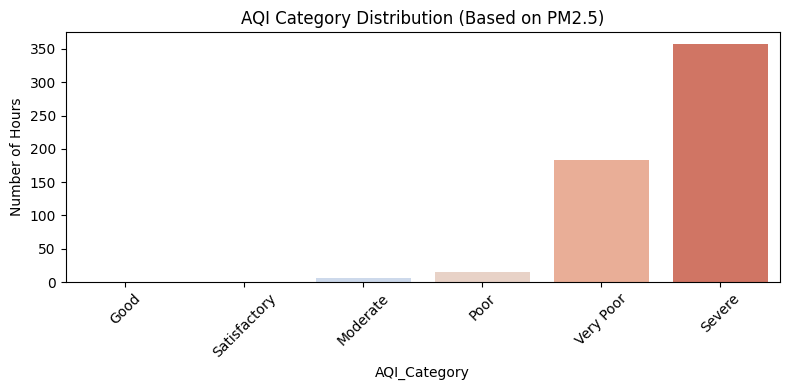

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='AQI_Category', order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'], palette='coolwarm')
plt.title('AQI Category Distribution (Based on PM2.5)')
plt.ylabel('Number of Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-347802513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='season', y='pm2_5', palette='Set2')


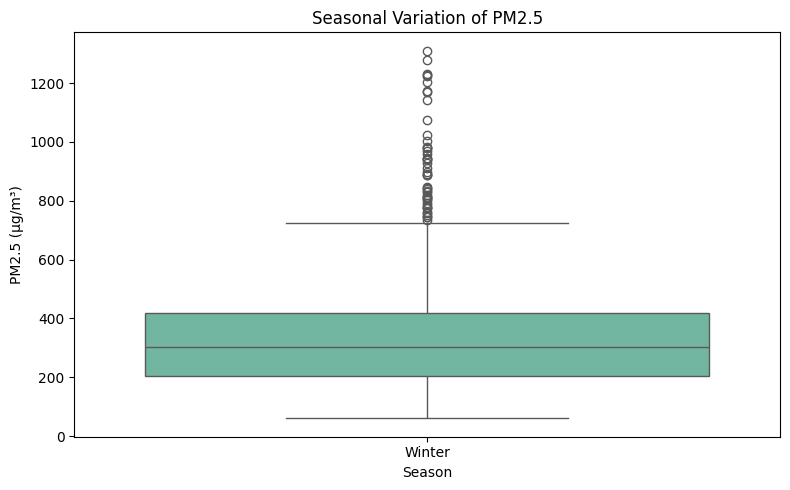

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='season', y='pm2_5', palette='Set2')
plt.title('Seasonal Variation of PM2.5')
plt.ylabel('PM2.5 (µg/m³)')
plt.xlabel('Season')
plt.tight_layout()
plt.show()


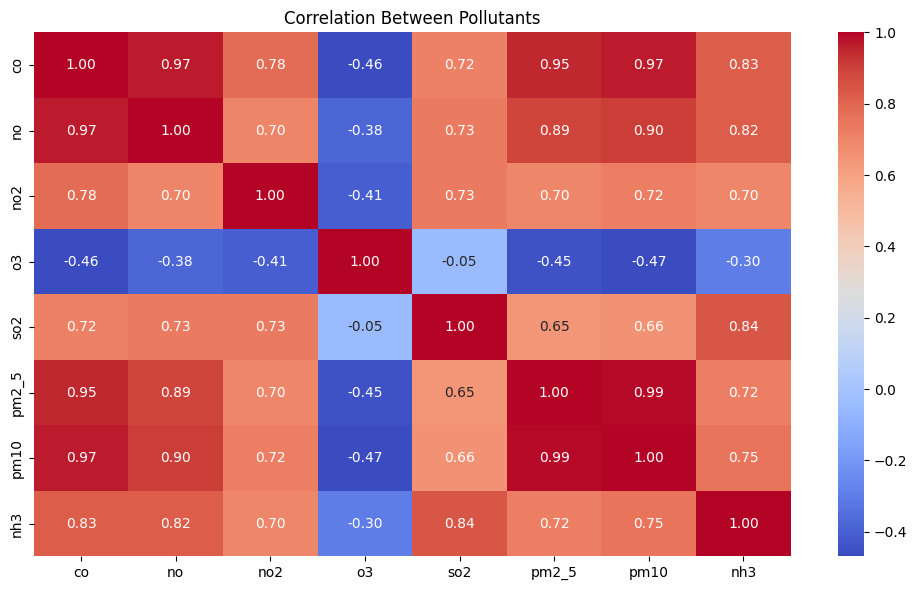

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['month', 'hour', 'day', 'weekday', 'season', 'date', 'AQI_Category']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Pollutants')
plt.tight_layout()
plt.show()